In [20]:
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('pre-processed_data.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,51,1.497164,-0.073197,0.00
1,7,4,10,3,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,33,-1.740070,-0.073197,0.00
2,7,4,10,7,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,33,-1.516813,-0.073197,0.00
3,8,6,3,6,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,97,-0.009824,0.602572,0.00
4,8,6,3,8,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,99,-1.237741,-0.073197,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,8,-1.638496,-0.845829,0.474309,-1.561947,1.534597,32,-0.735411,-0.073197,6.44
513,2,4,8,8,-1.638496,-0.845829,0.474309,-1.561947,0.518517,71,0.994835,-0.073197,54.29
514,7,4,8,8,-1.638496,-0.845829,0.474309,-1.561947,0.397965,70,1.497164,-0.073197,11.16
515,1,4,8,7,0.680298,0.548471,0.269122,0.499693,1.155720,42,-0.009824,-0.073197,0.00


In [ ]:
# Normalize countinous feature (except output (area) )

for column in df.columns:
    if df[column].dtype == 'float64' and column != 'area':
        mean = df[column].mean()
        std = df[column].std()
        df[column] = (df[column] - mean) / std

In [24]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,51,1.497164,-0.073197,0.00
1,7,4,10,3,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,33,-1.740070,-0.073197,0.00
2,7,4,10,7,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,33,-1.516813,-0.073197,0.00
3,8,6,3,6,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,97,-0.009824,0.602572,0.00
4,8,6,3,8,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,99,-1.237741,-0.073197,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,8,-1.638496,-0.845829,0.474309,-1.561947,1.534597,32,-0.735411,-0.073197,6.44
513,2,4,8,8,-1.638496,-0.845829,0.474309,-1.561947,0.518517,71,0.994835,-0.073197,54.29
514,7,4,8,8,-1.638496,-0.845829,0.474309,-1.561947,0.397965,70,1.497164,-0.073197,11.16
515,1,4,8,7,0.680298,0.548471,0.269122,0.499693,1.155720,42,-0.009824,-0.073197,0.00


# Model

In [25]:
class LinearRegression:
    def rmse(self, Y: np.ndarray , Y_pred: np.ndarray ) -> float:
        #calculate root-mean-square error
        delta = Y - Y_pred

        return (delta**2).mean()**0.5
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # optimize weights 
        inv_cov = np.linalg.inv(X.T @ X)
        self.thelta = inv_cov @ (X.T @ y)

    def predict(self, X: np.ndarray) -> np.ndarray:
        # predict the area (output)
        y = self.thelta.T @ X.T

        return y

In [26]:
X_Y = df.to_numpy()

In [27]:
X_Y

array([[ 7.00000000e+00,  5.00000000e+00,  3.00000000e+00, ...,
         1.49716438e+00, -7.31974162e-02,  0.00000000e+00],
       [ 7.00000000e+00,  4.00000000e+00,  1.00000000e+01, ...,
        -1.74007034e+00, -7.31974162e-02,  0.00000000e+00],
       [ 7.00000000e+00,  4.00000000e+00,  1.00000000e+01, ...,
        -1.51681277e+00, -7.31974162e-02,  0.00000000e+00],
       ...,
       [ 7.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
         1.49716438e+00, -7.31974162e-02,  1.11600000e+01],
       [ 1.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
        -9.82419660e-03, -7.31974162e-02,  0.00000000e+00],
       [ 6.00000000e+00,  3.00000000e+00,  1.10000000e+01, ...,
         2.69247762e-01, -7.31974162e-02,  0.00000000e+00]])

In [28]:
row = df.shape[0]
X_Y_train, X_Y_test = np.split(X_Y, indices_or_sections=[int(0.8*row)])

In [29]:
X_Y_train

array([[ 7.        ,  5.        ,  3.        , ...,  1.49716438,
        -0.07319742,  0.        ],
       [ 7.        ,  4.        , 10.        , ..., -1.74007034,
        -0.07319742,  0.        ],
       [ 7.        ,  4.        , 10.        , ..., -1.51681277,
        -0.07319742,  0.        ],
       ...,
       [ 6.        ,  3.        ,  2.        , ..., -0.73541129,
        -0.07319742,  0.        ],
       [ 7.        ,  4.        ,  2.        , ...,  3.00415295,
        -0.07319742,  4.62      ],
       [ 9.        ,  4.        ,  7.        , ...,  0.26924776,
        -0.07319742,  1.63      ]])

In [30]:
X_Y_test

array([[ 7.00000000e+00,  5.00000000e+00,  8.00000000e+00, ...,
        -2.33081763e-01, -7.31974162e-02,  0.00000000e+00],
       [ 5.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
        -9.82419660e-03, -7.31974162e-02,  0.00000000e+00],
       [ 8.00000000e+00,  6.00000000e+00,  8.00000000e+00, ...,
         4.92505328e-01, -7.31974162e-02,  7.46280000e+02],
       ...,
       [ 7.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
         1.49716438e+00, -7.31974162e-02,  1.11600000e+01],
       [ 1.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
        -9.82419660e-03, -7.31974162e-02,  0.00000000e+00],
       [ 6.00000000e+00,  3.00000000e+00,  1.10000000e+01, ...,
         2.69247762e-01, -7.31974162e-02,  0.00000000e+00]])

In [31]:
lr = LinearRegression()

In [32]:
X_train = X_Y_train[:,:12]
Y_train = X_Y_train[:,12:]

X_test = X_Y_test[:, :12]
Y_test = X_Y_test[:, 12:]

In [33]:
lr.fit(X_test, Y_test)

In [34]:
Y_predicted = lr.predict(X_test)

In [35]:
Y_predicted

array([[ 39.45309352,  17.91957497,  63.14030313,  36.0098609 ,
         26.99097712,  18.14359852,  11.31287699,  65.64940337,
         40.77903555,  60.35241257, -23.21305191,  47.672901  ,
         -7.98623112,  27.37974238,  26.0466439 ,  26.02248871,
         11.62683183,  35.71631194,   0.6433994 ,  63.98542286,
         -2.02445774,   6.94021565, -10.69863322,  48.49783959,
          8.76923069,   6.47920893, -39.34867537,  10.71710339,
         50.47241482,   9.50134085,  -3.59865387,  -1.69102623,
         -1.32613323,  -4.81519681,  11.56607895,  11.69593347,
         19.44078461,  32.35310595, -24.79695812,  32.489203  ,
         10.91848607,  -2.13984748,  -2.32433781, -10.92059213,
          3.22765053,  28.56005658,  37.28380273,  -1.53105979,
         28.56005658,   1.66383647,  27.93442378,  22.5068037 ,
        -49.25314918,  30.32688463,   3.05713909,  10.11050552,
         37.32314424,  20.429177  ,   8.90863013,  29.71732474,
         33.44616578,  20.01156389,  50.

In [36]:
lr.rmse(Y_test, Y_predicted)

82.7654777590771


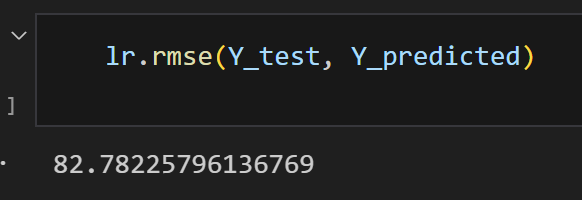
The rmse without normalizing countinous features show a

In [37]:
import matplotlib.pyplot as plt


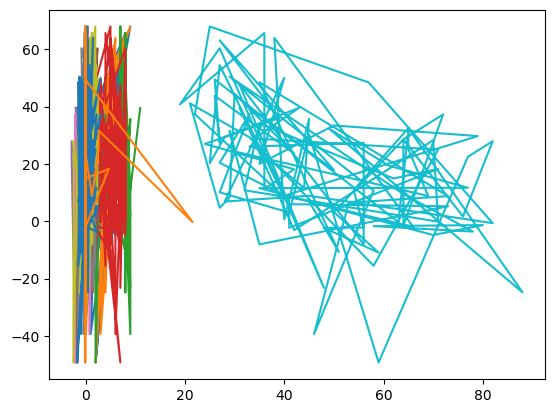

In [38]:
plt.plot(X_test, Y_predicted.T)